In [8]:
import tensorflow as tf
import os


In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[]

In [11]:
import cv2
import imghdr

In [12]:
data_dir = 'data3' 

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [14]:
image_exts[1]

'jpg'

In [15]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

horse01-0.png
horse01-1.png
horse01-2.png
horse01-3.png
horse01-4.png
horse01-5.png
horse01-6.png
horse01-7.png
horse01-8.png
horse01-9.png
horse02-0.png
horse02-1.png
horse02-2.png
horse02-3.png
horse02-4.png
horse02-5.png
horse02-6.png
horse02-7.png
horse02-8.png
horse02-9.png
horse03-0.png
horse03-1.png
horse03-2.png
horse03-3.png
horse03-4.png
horse03-5.png
horse03-6.png
horse03-7.png
horse03-8.png
horse03-9.png
horse04-0.png
horse04-1.png
horse04-2.png
horse04-3.png
horse04-4.png
horse04-5.png
horse04-6.png
horse04-7.png
horse04-8.png
horse04-9.png
horse05-0.png
horse05-1.png
horse05-2.png
horse05-3.png
horse05-4.png
horse05-5.png
horse05-6.png
horse05-7.png
horse05-8.png
horse05-9.png
horse06-0.png
horse06-1.png
horse06-2.png
horse06-3.png
horse06-4.png
horse06-5.png
horse06-6.png
horse06-7.png
horse06-8.png
horse06-9.png
horse07-0.png
horse07-1.png
horse07-2.png
horse07-3.png
horse07-4.png
horse07-5.png
horse07-6.png
horse07-7.png
horse07-8.png
horse07-9.png
horse08-0.png
horse0

In [16]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [17]:
import numpy as np
from matplotlib import pyplot as plt

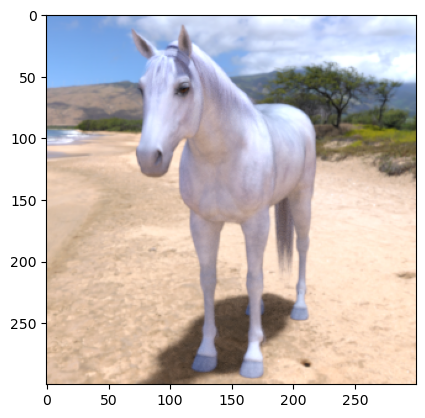

In [18]:
img = cv2.imread(os.path.join('data3','horses','horse01-0.png' ))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
data = tf.keras.utils.image_dataset_from_directory('data3')

Found 1029 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
# Get another batch from the iterator
batch = data_iterator.next()

In [22]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [23]:

batch[1]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1])

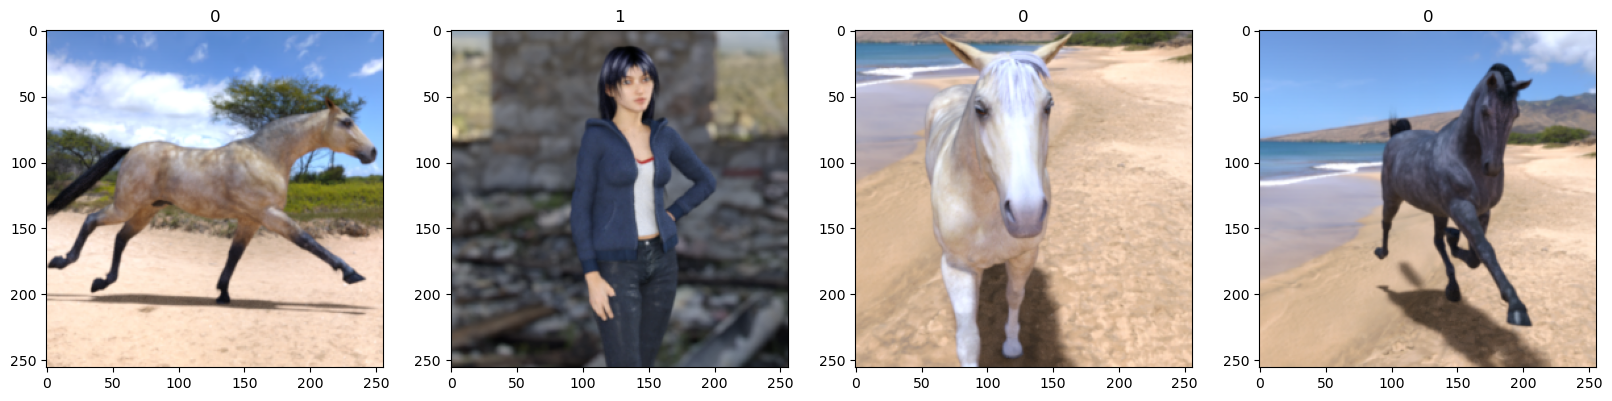

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
data = data.map(lambda x,y: (x/255, y))

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

In [28]:
batch[0].max()

1.0

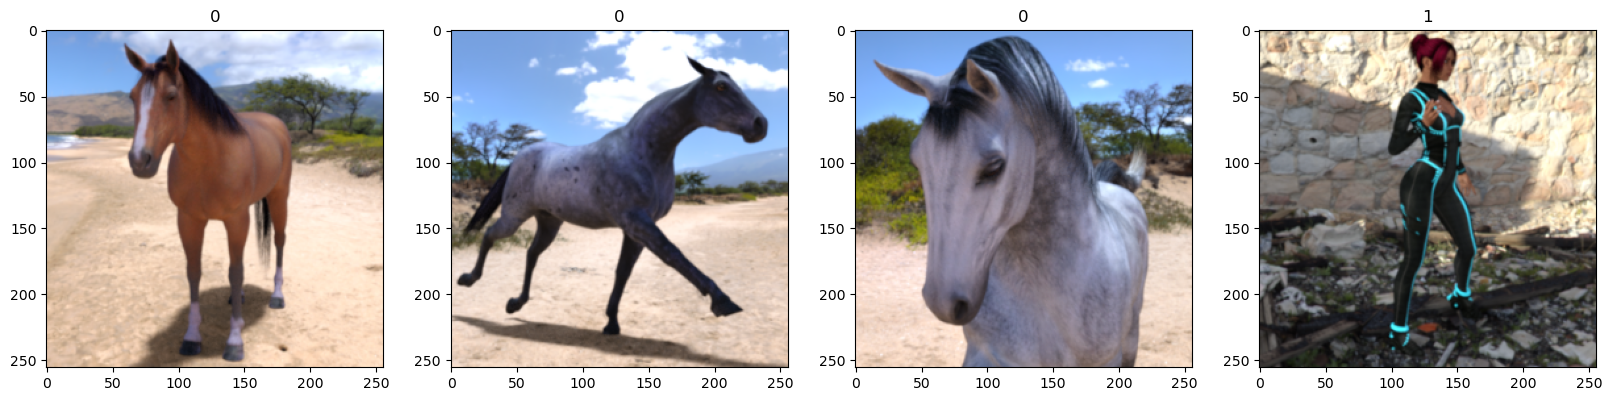

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [30]:
data.as_numpy_iterator().next()

(array([[[[0.6202529 , 0.69803923, 0.76862746],
          [0.6236163 , 0.6981261 , 0.76862746],
          [0.62386644, 0.69837624, 0.76862746],
          ...,
          [0.53691787, 0.54490584, 0.57815564],
          [0.53691787, 0.5421006 , 0.57622045],
          [0.53722596, 0.5408684 , 0.57254905]],
 
         [[0.62454045, 0.69905025, 0.7687143 ],
          [0.6252908 , 0.6998006 , 0.7696385 ],
          [0.627451  , 0.7019608 , 0.7696385 ],
          ...,
          [0.53333336, 0.5424271 , 0.5771446 ],
          [0.53333336, 0.5404261 , 0.57254905],
          [0.53599375, 0.53750503, 0.5679534 ]],
 
         [[0.6354418 , 0.70518607, 0.7705047 ],
          [0.63038665, 0.7032114 , 0.77254903],
          [0.629136  , 0.7019608 , 0.77254903],
          ...,
          [0.5316483 , 0.5402155 , 0.57423407],
          [0.5316483 , 0.5378315 , 0.5696385 ],
          [0.5316483 , 0.5357147 , 0.5650429 ]],
 
         ...,
 
         [[0.24816176, 0.23023897, 0.22150736],
          [0.27085

In [31]:
len(data)

33

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+2
test_size = int(len(data)*.1)+1

In [33]:
test_size + val_size+train_size

35

In [34]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [35]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 20s 775ms/step - loss: 0.5128 - accuracy: 0.7391 - val_loss: 0.2234 - val_accuracy: 0.9062
Epoch 2/20
23/23 [==============================] - 16s 666ms/step - loss: 0.1380 - accuracy: 0.9375 - val_loss: 0.0602 - val_accuracy: 0.9766
Epoch 3/20
23/23 [==============================] - 15s 640ms/step - loss: 0.0327 - accuracy: 0.9864 - val_loss: 0.0217 - val_accuracy: 0.9961
Epoch 4/20
23/23 [==============================] - 16s 676ms/step - loss: 0.0101 - accuracy: 0.9973 - val_loss: 0.0110 - val_accuracy: 0.9961
Epoch 5/20
23/23 [==============================] - 16s 660ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0236 - val_accuracy: 0.9922
Epoch 6/20
23/23 [==============================] - 16s 662ms/step - loss: 9.7565e-04 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9961
Epoch 7/20
23/23 [==============================] - 16s 658ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.

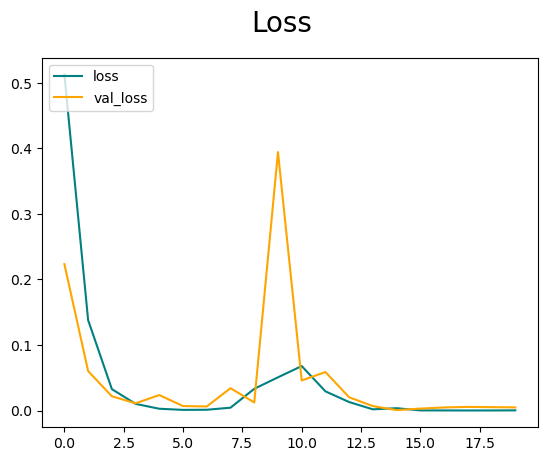

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

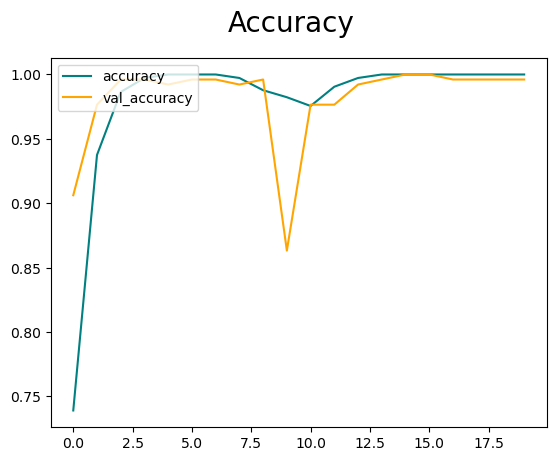

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 96ms/step


In [49]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [50]:
import cv2

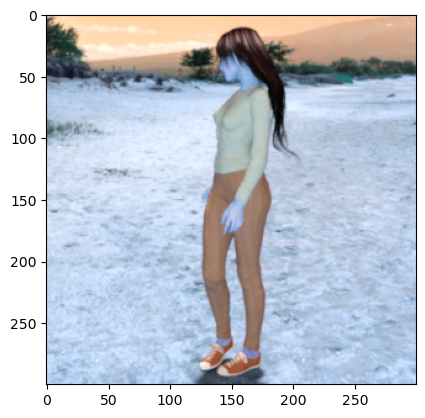

In [51]:
#img = cv2.imread('Sad1.jpg')
img = cv2.imread(os.path.join('data3','humans','human01-00.png' ))
#img = cv2.imread(os.path.join('data2','apple','_109228504_apples1.jpg' ))
#img = cv2.imread(os.path.join('data2','banana','Sad1.jpg' ))
plt.imshow(img)

plt.show()

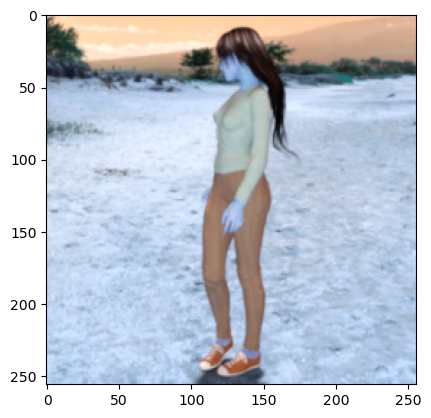

In [52]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [53]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [54]:
yhat

array([[0.9982911]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is a human')
else:
    print(f'Predicted class is a horse')

Predicted class is a human


In [56]:
from tensorflow.keras.models import load_model


In [57]:
#model.save(os.path.join('models','AoB40epochs.h4'))

In [58]:
os.path.join('models', 'AoB20epochs.h4')

'models\\AoB20epochs.h4'

In [59]:
new_model = load_model(os.path.join('models', 'AoB20epochs.h4'))

In [60]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 81ms/step


array([[0.1938437]], dtype=float32)

In [61]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [62]:
img = cv2.imread(os.path.join('data3','humans','horse01-0.png' ))

In [63]:
if yhatnew > 0.5: 
    print(f'Predicted class is a human')
else:
    print(f'Predicted class is a horse')

Predicted class is a horse
